<a href="https://colab.research.google.com/github/Hernanros/anyway-data-science/blob/EDA/EDA/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [15]:
!unzip /content/drive/My Drive/views_2019.zip

Archive:  ./views_2019.zip
   creating: views_2019/
  inflating: __MACOSX/._views_2019   
  inflating: views_2019/markers_hebrew.csv  
  inflating: views_2019/involved_markers_hebrew.csv  
  inflating: views_2019/involved_hebrew.csv  
  inflating: views_2019/vehicles_markers_hebrew.csv  
  inflating: views_2019/vehicles_hebrew.csv  


In [20]:
! git clone -b EDA https://github.com/Hernanros/anyway-data-science 

Cloning into 'anyway-data-science'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 207 (delta 14), reused 37 (delta 5), pack-reused 156
Receiving objects: 100% (207/207), 2.29 MiB | 11.84 MiB/s, done.
Resolving deltas: 100% (95/95), done.


In [1]:
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 999

# Exploratory data analysis
The purpose of this notebook is to get aqueinted with some of the data that we will be working with.<br>

**Workflow:**<br>
1. understand the shape, size and frequency of some of the key columns
2. inspect shapes and differences between different columns w.r to amount of data and number of NA's
3. make some simple assumptions and try to show them in plot.
4. column drill down: take an examplary data column and try to break it down into some basic questions.

**Data:**<br>
I will be starting with the Israel's Central Bearau of Statistics car accidents data for years between 2008-2018. <br>
background: the CBS data is collected over 3 different datsets:<br>
1. Markers - DS contatining mostly rellavant data about the traffic accidents incendents themselves
2. Involved - DS focusing on personal information of the people involved in the incidents
3. Vehicles - DS focusing on technical data regarding the vehicals in the incedent
The data is made public through regular dumps, the tables disposables for us were collected and pre-processed by the Anyway Data science team. the result of that is a concatenation of tables:
  - involved hebrew
  - involved markers hebrew
  - markers hebrew
  - vehicles hebrew
  - vehicles markers hebrew

For starters, I would like to start to explore the Involved+Markers DS.<br>
Alongside with the DS, We also have a columns context dictionary that originated from the CBS.

In [3]:
path= '/content/drive/My Drive/views_2019'
full_involved = pd.read_csv('{}/involved_markers_hebrew.csv'.format(path),header=0,index_col='provider_and_id')
field_meaning = pd.read_excel('/content/drive/My Drive/views_2019/Fields_Meaning_for_2008-2018.xlsx',index_col='table_field_name')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (44) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [332]:
print(full_involved.shape)
full_involved.head()


(1909382, 157)


,accident_id,provider_code,file_type_police,involved_type,involved_type_hebrew,license_acquiring_date,age_group,age_group_hebrew,sex,sex_hebrew,involve_vehicle_type,involve_vehicle_type_hebrew,safety_measures,safety_measures_hebrew,involve_yishuv_symbol,involve_yishuv_name,injury_severity,injury_severity_hebrew,injured_type,injured_type_hebrew,injured_position,injured_position_hebrew,population_type,population_type_hebrew,involve_home_region,involve_home_region_hebrew,involve_home_district,involve_home_district_hebrew,involve_home_natural_area,involve_home_natural_area_hebrew,involve_home_municipal_status,involve_home_municipal_status_hebrew,involve_home_yishuv_shape,involve_home_yishuv_shape_hebrew,hospital_time,hospital_time_hebrew,medical_type,medical_type_hebrew,release_dest,release_dest_hebrew,safety_measures_use,safety_measures_use_hebrew,late_deceased,late_deceased_hebrew,car_id,involve_id,accident_year,accident_month,provider_code_hebrew,accident_timestamp,accident_type,accident_type_hebrew,accident_severity,accident_severity_hebrew,location_accuracy,location_accuracy_hebrew,road_type,road_type_hebrew,road_shape,road_shape_hebrew,day_type,day_type_hebrew,police_unit,police_unit_hebrew,one_lane,one_lane_hebrew,multi_lane,multi_lane_hebrew,speed_limit,speed_limit_hebrew,road_intactness,road_intactness_hebrew,road_width,road_width_hebrew,road_sign,road_sign_hebrew,road_light,road_light_hebrew,road_control,road_control_hebrew,weather,weather_hebrew,road_surface,road_surface_hebrew,road_object,road_object_hebrew,object_distance,object_distance_hebrew,didnt_cross,didnt_cross_hebrew,cross_mode,cross_mode_hebrew,cross_location,cross_location_hebrew,cross_direction,cross_direction_hebrew,road1,road2,km,km_raw,km_accurate,road_segment_id,road_segment_number,road_segment_name,accident_yishuv_symbol,accident_yishuv_name,geo_area,geo_area_hebrew,day_night,day_night_hebrew,day_in_week,day_in_week_hebrew,traffic_light,traffic_light_hebrew,accident_region,accident_region_hebrew,accident_district,accident_district_hebrew,accident_natural_area,accident_natural_area_hebrew,accident_municipal_status,accident_municipal_status_hebrew,accident_yishuv_shape,accident_yishuv_shape_hebrew,street1,street1_hebrew,street2,street2_hebrew,non_urban_intersection,non_urban_intersection_hebrew,non_urban_intersection_by_junction_number,accident_day,accident_hour_raw,accident_hour_raw_hebrew,accident_hour,accident_minute,geom,longitude,latitude,x,y,engine_volume,engine_volume_hebrew,manufacturing_year,driving_directions,driving_directions_hebrew,vehicle_status,vehicle_status_hebrew,vehicle_attribution,vehicle_attribution_hebrew,seats,total_weight,total_weight_hebrew,vehicle_vehicle_type,vehicle_vehicle_type_hebrew,vehicle_damage,vehicle_damage_hebrew
provider_and_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12010034003,2010034003,1,NaN,1,נהג,1998,7,30-34,1.0,זכר,11.0,אוטובוס,5,לא ידוע,7100,אשקלון,0,NaN,0,NaN,8,לא ידוע,1,יהודים,6.0,הדרום,61,אשקלון,614.0,אזור אשקלון,0.0,עירייה,14.0,"100,000-199,999-תושב, יישוב יהודי",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,2010,1,הלשכה המרכזית לסטטיסטיקה - סוג תיק 1,2010-01-31 13:00:00,1,פגיעה בהולך רגל,3,קלה,3,מרכז דרך,2,עירונית לא בצומת,9,אחר,4,יום אחר,52,מרחב שפלה,0,NaN,2,מיפרדה עם גדר בטיחות,1,"עד 50 קמ""ש",0,לא ידוע,3,7 עד 10.5 מטר,5,לא ידוע,1,אור יום רגיל,NaN,NaN,1,בהיר,1,יבש,9,לא ידוע,9,לא ידוע,9,לא ידוע,0,NaN,0,NaN,9,לא ידוע,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8400,רחובות,1,ישראל ללא יהודה ושומרון,1,יום,1,ראשון,9,לא ידוע,4.0,המרכז,44,רחובות,441.0,אזור רחובות,0.0,עירייה,14.0,"100,000-199,999-תושב, יישוב יהודי",416.0,"ביל""ו",NaN,NaN,NaN,NaN,NaN,31,53,NaN,13,0,0101000020E610000072DECB389C6741406D86311EE7E4...,34.809455,31.894152,182083.0,644642.0,13.0,10001+,2008.0,0.0,לא ידוע,0.0,NaN,1.0,ישראלי,53.0,11.0,16.0-19.0,11.0,אוטובוס,NaN,NaN
12010025646,2010025646,1,NaN,2,נהג נפגע,2003,6,25-29,1.0,זכר,10.0,"אופ

In [333]:
print(field_meaning.shape)
field_meaning.head()

(55, 6)


,hebrew_field_name,cbs_field_name,cbs_field_meaning,Field Details,possible values: ColumeValue_ColumnValueHebrew,Irregular Values
table_field_name,,,,,,
id,NaN,PK_TEUNA_FIKT‭,‬מס‭ ‬תאונה‭,"מזהה פיקטיבי של תאונה. אינו ייחודי, מכיוון שיכ...",NaN,NaN
provider_and_id,NaN,NaN,סוג תיק ו-id,מזהה פיקטיבי וייחודי של תאונה. מספר שספרתו הרא...,NaN,NaN
provider_code,provider_code_hebrew,SUG_TIK,סוג תיק,סוג תיק (1 או 3). תאונה מסוג תיק 1: תאונת דרכי...,1_הלשכה המרכזית לסטטיסטיקה - סוג תיק 1\n3_הלשכ...,NaN
accident_type,accident_type_hebrew,SUG_TEUNA‭,‬סוג‭ ‬תאונה‭,"סוג תאונה: נקבע לפי המצב ההתחלתי של התאונה, אל...",1_פגיעה בהולך רגל \n2_התנגשות חזית אל צד\n2_הת...,שימו לב שהלמ״ס שינו מעט את תרגום ערך 2 וערך 17...
accident_severity,accident_severity_hebrew,HUMRAT_TEUNA‭,‬חומרת‭ ‬תאונה‭,‬חומרת‭ ‬התאונה‭ ‬נקבעת‭ ‬לפי‭ ‬חומרת‭ ‬הפגיעה...,1_קטלנית\n 2_קשה\n 3_קלה,NaN


## Columns exploration
I'll try to understand a bit the columns and select a few importent ones

In [6]:
tot_col_num=full_involved.shape[1]
dups=len(re.findall('hebrew',' '.join(list(full_involved.columns))))
original_num = tot_col_num- dups
no_dup= tot_col_num-2*(dups)

print ('out of the {} columns in the dataset, {} are actually a duplication of an other columns. \nthat leaves us with {} columns in total and {} columns without duplication'.format(
    tot_col_num, dups, original_num, no_dup))

out of the 157 columns in the dataset, 63 are actually a duplication of an other columns. 
that leaves us with 94 columns in total and 31 columns without duplication


The DS has 2 indexes: the accident I.D )which is not unique and the provider and id index which is unique for each person that was affected by the accident. I may want to keep the accident ID as a multi index for another dataframe

In [0]:
by_marker_df=full_involved.reset_index().set_index(['accident_id','provider_and_id'])

In [8]:
by_marker_df.head()

provider_code  file_type_police  involved_type  \
accident_id provider_and_id                                                   
2010034003  12010034003                  1               NaN              1   
2010025646  12010025646                  1               NaN              2   
2010021723  12010021723                  1               NaN              3   
            12010021723                  1               NaN              1   
2010024243  12010024243                  1               NaN              1   

                            involved_type_hebrew  license_acquiring_date  \
accident_id provider_and_id                                                
2010034003  12010034003                      נהג                    1998   
2010025646  12010025646                 נהג נפגע                    2003   
2010021723  12010021723                     נפגע                       0   
            12010021723                      נהג                    2004   
2010024243  12010024243                      נהג                    1993   

                             age_group age_group_hebrew  sex sex_hebrew  \
accident_id provider_and_id                                               
2010034003  12010034003              7            30-34  1.0        זכר   
2010025646  12010025646              6            25-29  1.0        זכר   
2010021723  12010021723             10            45-49  2.0       נקבה   
            12010021723              5            20-24  1.0        זכר   
2010024243  12010024243              8            35-39  2.0       נקבה   

                             involve_vehicle_type involve_vehicle_type_hebrew  \
accident_id provider_and_id                                                     
2010034003  12010034003                      11.0                     אוטובוס   
2010025646  12010025646                      10.0      אופנוע 126 עד 400 סמ"ק   
2010021723  12010021723                       1.0             רכב נוסעים פרטי   
            12010021723                       1.0             רכב נוסעים פרטי   
2010024243  12010024243                       1.0             רכב נוסעים פרטי   

                             safety_measures     safety_measures_hebrew  \
accident_id provider_and_id                                               
2010034003  12010034003                    5                    לא ידוע   
2010025646  12010025646                    2  חבש קסדת מגן (רק לאופנוע)   
2010021723  12010021723                    5                    לא ידוע   
            12010021723                    5                    לא ידוע   
2010024243  12010024243                    5                    לא ידוע   

                             involve_yishuv_symbol involve_yishuv_name  \
accident_id provider_and_id                                              
2010034003  12010034003                       7100              אשקלון   
2010025646  12010025646                       2650           רמת השרון   
2010021723  12010021723                       8400              רחובות   
            12010021723                       8400              רחובות   
2010024243  12010024243                       2600                אילת   

                             injury_severity injury_severity_hebrew  \
accident_id provider_and_id                                           
2010034003  12010034003                    0                    NaN   
2010025646  12010025646                    3                פצוע קל   
2010021723  12010021723                    3                פצוע קל   
            12010021723                    0                    NaN   
2010024243  12010024243                    0                    NaN   

                             injured_type            injured_type_hebrew  \
accident_id provider_and_id                                                
2010034003  12010034003                 0                            NaN   
2010025646  12010025646                 4                   נהג - אופנוע   
2

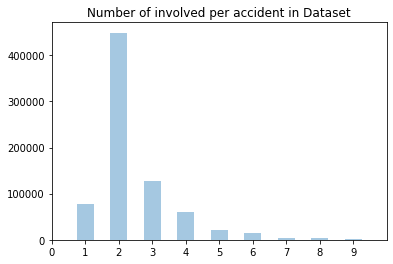

In [83]:
involved_per_accident= full_involved.groupby('accident_id').size().sort_values()
sns.distplot(involved_per_accident.values,bins=np.arange(0.25,10.25,0.5),kde=False);
plt.title('Number of involved per accident in Dataset')
plt.xlim(0,10);
plt.xticks(np.arange(10));

It may be a lot to take in, for startes I'll subsample the dataset with only 20 accidents and 15 columns at a time and see if I make sense of it.

In [445]:
#let's select a subset of 15 accidents
markers=np.random.choice(full_involved.accident_id.unique(),500,False)
sample=by_marker_df.loc[markers,:].sort_index()

print('we have 500 accidents with {} total participants.'.format(sample.shape[0]))
sample.head()

we have 500 accidents with 1274 total participants.


provider_code  file_type_police  involved_type  \
accident_id provider_and_id                                                   
2008001615  32008001615                  3               NaN              2   
            32008001615                  3               NaN              3   
2008005711  32008005711                  3               NaN              1   
            32008005711                  3               NaN              2   
2008006939  32008006939                  3               NaN              2   

                            involved_type_hebrew  license_acquiring_date  \
accident_id provider_and_id                                                
2008001615  32008001615                 נהג נפגע                    2003   
            32008001615                     נפגע                       0   
2008005711  32008005711                      נהג                       0   
            32008005711                 נהג נפגע                    1993   
2008006939  32008006939                 נהג נפגע                    1978   

                             age_group age_group_hebrew  sex sex_hebrew  \
accident_id provider_and_id                                               
2008001615  32008001615              5            20-24  1.0        זכר   
            32008001615              5            20-24  1.0        זכר   
2008005711  32008005711             99          לא ידוע  0.0        NaN   
            32008005711              7            30-34  1.0        זכר   
2008006939  32008006939             10            45-49  1.0        זכר   

                             involve_vehicle_type involve_vehicle_type_hebrew  \
accident_id provider_and_id                                                     
2008001615  32008001615                      10.0      אופנוע 126 עד 400 סמ"ק   
            32008001615                      10.0      אופנוע 126 עד 400 סמ"ק   
2008005711  32008005711                       1.0             רכב נוסעים פרטי   
            32008005711                       1.0             רכב נוסעים פרטי   
2008006939  32008006939                       1.0             רכב נוסעים פרטי   

                             safety_measures     safety_measures_hebrew  \
accident_id provider_and_id                                               
2008001615  32008001615                    2  חבש קסדת מגן (רק לאופנוע)   
            32008001615                    2  חבש קסדת מגן (רק לאופנוע)   
2008005711  32008005711                    5                    לא ידוע   
            32008005711                    1                  חגר חגורה   
2008006939  32008006939                    1                  חגר חגורה   

                             involve_yishuv_symbol involve_yishuv_name  \
accident_id provider_and_id                                              
2008001615  32008001615                        686           נווה ימין   
            32008001615                       6900             כפר סבא   
2008005711  32008005711                          0                 NaN   
            32008005711                       2055                מאור   
2008006939  32008006939                        390                רגבה   

                             injury_severity injury_severity_hebrew  \
accident_id provider_and_id                                           
2008001615  32008001615                    3                פצוע קל   
            32008001615                    3                פצוע קל   
2008005711  32008005711                    0                    NaN   
            32008005711                    3                פצוע קל   
2008006939  32008006939                    3                פצוע קל   

                             injured_type           injured_type_hebrew  \
accident_id provider_and_id                                               
2008001615  32008001615                 4                  נהג - אופנוע   
            32008001615                 5        נוסע - אופנוע (לא נהג)   
20080

Text(0.5, 1.0, 'Number of involved per accident in sample')

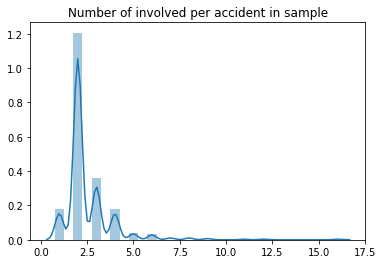

In [446]:
involved_per_accident= full_involved.groupby('accident_id').size()[markers].sort_values()
sns.distplot(involved_per_accident.values,bins=np.arange(0.25,7.25,.5));
plt.title('Number of involved per accident in sample')

In [447]:
involved_per_accident.sort_values(ascending=False)

accident_id
2011044807    16
2011054373    12
2009047599    11
2015012564     9
2015077814     9
              ..
2008016844     1
2009027819     1
2011019803     1
2016017569     1
2017059208     1
Length: 500, dtype: int64

Since the numerical columns are just a numeric representation of labeled variables, for the sake of the exploration we will use only the labeled data.
In addition we will look for the columns who are in fact numerical and doesn't have labeled representation.

In [448]:
sample.iloc[:5,:75]

provider_code  file_type_police  involved_type  \
accident_id provider_and_id                                                   
2008001615  32008001615                  3               NaN              2   
            32008001615                  3               NaN              3   
2008005711  32008005711                  3               NaN              1   
            32008005711                  3               NaN              2   
2008006939  32008006939                  3               NaN              2   

                            involved_type_hebrew  license_acquiring_date  \
accident_id provider_and_id                                                
2008001615  32008001615                 נהג נפגע                    2003   
            32008001615                     נפגע                       0   
2008005711  32008005711                      נהג                       0   
            32008005711                 נהג נפגע                    1993   
2008006939  32008006939                 נהג נפגע                    1978   

                             age_group age_group_hebrew  sex sex_hebrew  \
accident_id provider_and_id                                               
2008001615  32008001615              5            20-24  1.0        זכר   
            32008001615              5            20-24  1.0        זכר   
2008005711  32008005711             99          לא ידוע  0.0        NaN   
            32008005711              7            30-34  1.0        זכר   
2008006939  32008006939             10            45-49  1.0        זכר   

                             involve_vehicle_type involve_vehicle_type_hebrew  \
accident_id provider_and_id                                                     
2008001615  32008001615                      10.0      אופנוע 126 עד 400 סמ"ק   
            32008001615                      10.0      אופנוע 126 עד 400 סמ"ק   
2008005711  32008005711                       1.0             רכב נוסעים פרטי   
            32008005711                       1.0             רכב נוסעים פרטי   
2008006939  32008006939                       1.0             רכב נוסעים פרטי   

                             safety_measures     safety_measures_hebrew  \
accident_id provider_and_id                                               
2008001615  32008001615                    2  חבש קסדת מגן (רק לאופנוע)   
            32008001615                    2  חבש קסדת מגן (רק לאופנוע)   
2008005711  32008005711                    5                    לא ידוע   
            32008005711                    1                  חגר חגורה   
2008006939  32008006939                    1                  חגר חגורה   

                             involve_yishuv_symbol involve_yishuv_name  \
accident_id provider_and_id                                              
2008001615  32008001615                        686           נווה ימין   
            32008001615                       6900             כפר סבא   
2008005711  32008005711                          0                 NaN   
            32008005711                       2055                מאור   
2008006939  32008006939                        390                רגבה   

                             injury_severity injury_severity_hebrew  \
accident_id provider_and_id                                           
2008001615  32008001615                    3                פצוע קל   
            32008001615                    3                פצוע קל   
2008005711  32008005711                    0                    NaN   
            32008005711                    3                פצוע קל   
2008006939  32008006939                    3                פצוע קל   

                             injured_type           injured_type_hebrew  \
accident_id provider_and_id                                               
2008001615  32008001615                 4                  נהג - אופנוע   
            32008001615                 5        נוסע - אופנוע (לא נהג)   
20080

In [0]:
numeric=['involve_yishuv_name', 'car_id','involve_id', 'accident_timestamp','accident_hour', 'road1',	'road2',	'km',	'km_raw','road_segment_name', 'accident_yishuv_name',  'geom', 'longitude','latitude', 'x','y','seats'] 

In [450]:
heb_cols=[col for col in list(sample.columns) if 'hebrew' in col]
heb_cols = ['involved_type_hebrew',
 'age_group_hebrew',
 'sex_hebrew',
 'involve_vehicle_type_hebrew',
 'injury_severity_hebrew',
 'injured_type_hebrew',
 'injured_position_hebrew',
 'involve_home_region_hebrew',
 'involve_home_district_hebrew',
 'involve_home_yishuv_shape_hebrew',
 'hospital_time_hebrew',
 'medical_type_hebrew',
 'release_dest_hebrew',
 'safety_measures_use_hebrew',
 'late_deceased_hebrew',
 'accident_severity_hebrew',
 'location_accuracy_hebrew',
 'road_type_hebrew',
 'road_shape_hebrew',
 'one_lane_hebrew',
 'multi_lane_hebrew',
 'speed_limit_hebrew',
 'road_control_hebrew',
 'geo_area_hebrew',
 'day_night_hebrew',
 'traffic_light_hebrew',
 'accident_region_hebrew',
 'accident_yishuv_shape_hebrew',
 'vehicle_damage_hebrew']
new_cols = heb_cols+numeric
len(new_cols),new_cols

(46,
 ['involved_type_hebrew',
  'age_group_hebrew',
  'sex_hebrew',
  'involve_vehicle_type_hebrew',
  'injury_severity_hebrew',
  'injured_type_hebrew',
  'injured_position_hebrew',
  'involve_home_region_hebrew',
  'involve_home_district_hebrew',
  'involve_home_yishuv_shape_hebrew',
  'hospital_time_hebrew',
  'medical_type_hebrew',
  'release_dest_hebrew',
  'safety_measures_use_hebrew',
  'late_deceased_hebrew',
  'accident_severity_hebrew',
  'location_accuracy_hebrew',
  'road_type_hebrew',
  'road_shape_hebrew',
  'one_lane_hebrew',
  'multi_lane_hebrew',
  'speed_limit_hebrew',
  'road_control_hebrew',
  'geo_area_hebrew',
  'day_night_hebrew',
  'traffic_light_hebrew',
  'accident_region_hebrew',
  'accident_yishuv_shape_hebrew',
  'vehicle_damage_hebrew',
  'involve_yishuv_name',
  'car_id',
  'involve_id',
  'accident_timestamp',
  'accident_hour',
  'road1',
  'road2',
  'km',
  'km_raw',
  'road_segment_name',
  'accident_yishuv_name',
  'geom',
  'longitude',
  'latitud

In [451]:
sample=sample[new_cols].reset_index().set_index('provider_and_id')
sample.head()

,accident_id,involved_type_hebrew,age_group_hebrew,sex_hebrew,involve_vehicle_type_hebrew,injury_severity_hebrew,injured_type_hebrew,injured_position_hebrew,involve_home_region_hebrew,involve_home_district_hebrew,involve_home_yishuv_shape_hebrew,hospital_time_hebrew,medical_type_hebrew,release_dest_hebrew,safety_measures_use_hebrew,late_deceased_hebrew,accident_severity_hebrew,location_accuracy_hebrew,road_type_hebrew,road_shape_hebrew,one_lane_hebrew,multi_lane_hebrew,speed_limit_hebrew,road_control_hebrew,geo_area_hebrew,day_night_hebrew,traffic_light_hebrew,accident_region_hebrew,accident_yishuv_shape_hebrew,vehicle_damage_hebrew,involve_yishuv_name,car_id,involve_id,accident_timestamp,accident_hour,road1,road2,km,km_raw,road_segment_name,accident_yishuv_name,geom,longitude,latitude,x,y,seats
provider_and_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
32008001615,2008001615,נהג נפגע,20-24,זכר,"אופנוע 126 עד 400 סמ""ק",פצוע קל,נהג - אופנוע,ישב ברכב במושב קדמי,המרכז,פתח תקווה,מושבים (לרבות כפרים שיתופיים),NaN,NaN,NaN,NaN,NaN,קלה,מרכז דרך,עירונית לא בצומת,כביש ישר / צומת,לא ידוע מס מסלולים,NaN,לא ידוע,NaN,ישראל ללא יהודה ושומרון,לילה,לא ידוע,המרכז,"50,000-99,999-תושב, יישוב יהודי",NaN,נווה ימין,1,1,2008-08-20 01:15:00,1,NaN,NaN,NaN,NaN,NaN,כפר סבא,0101000020E61000001DE5AA55F67741402A5C68458017...,34.937205,32.183602,194248.0,676702.0,1.0
32008001615,2008001615,נפגע,20-24,זכר,"אופנוע 126 עד 400 סמ""ק",פצוע קל,נוסע - אופנוע (לא נהג),ישב ברכב במושב קדמי,המרכז,פתח תקווה,"50,000-99,999-תושב, יישוב יהודי",NaN,NaN,NaN,NaN,NaN,קלה,מרכז דרך,עירונית לא בצומת,כביש ישר / צומת,לא ידוע מס מסלולים,NaN,לא ידוע,NaN,ישראל ללא יהודה ושומרון,לילה,לא ידוע,המרכז,"50,000-99,999-תושב, יישוב יהודי",NaN,כפר סבא,1,2,2008-08-20 01:15:00,1,NaN,NaN,NaN,NaN,NaN,כפר סבא,0101000020E61000001DE5AA55F67741402A5C68458017...,34.937205,32.183602,194248.0,676702.0,1.0
32008005711,2008005711,נהג,לא ידוע,NaN,רכב נוסעים פרטי,NaN,NaN,לא ידוע,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,קלה,מרכז ישוב,עירונית לא בצומת,כביש ישר / צומת,לא ידוע מס מסלולים,NaN,לא ידוע,NaN,ישראל ללא יהודה ושומרון,לילה,לא ידוע,המרכז,קיבוצים,NaN,NaN,1,2,2008-12-11 06:30:00,6,NaN,NaN,NaN,NaN,NaN,משמר השרון,0101000020E6100000B7AE1AA0E27341403ECC499EC42D...,34.905354,32.357563,191298.0,696001.0,99.0
32008005711,2008005711,נהג נפגע,30-34,זכר,רכב נוסעים פרטי,פצוע קל,נהג - רכב בעל 4 גלגלים ויותר,ישב ברכב במושב קדמי,חיפה,חדרה,מושבים (לרבות כפרים שיתופיים),NaN,NaN,NaN,NaN,NaN,קלה,מרכז ישוב,עירונית לא בצומת,כביש ישר / צומת,לא ידוע מס מסלולים,NaN,לא ידוע,NaN,ישראל ללא יהודה ושומרון,לילה,לא ידוע,המרכז,קיבוצים,NaN,מאור,2,1,2008-12-11 06:30:00,6,NaN,NaN,NaN,NaN,NaN,משמר השרון,0101000020E6100000B7AE1AA0E27341403ECC499EC42D...,34.905354,32.357563,191298.0,696001.0,99.0
32008006939,2008006939,נהג נפגע,45-49,זכר,רכב נוסעים פרטי,פצוע קל,נהג - רכב בעל 4 גלגלים ויותר,ישב ברכב במושב קדמי,הצפון,עכו,מושבים שיתופיים,NaN,NaN,NaN,NaN,NaN,קלה,עיגון מדויק,לא-עירונית בצומת,כביש ישר / צומת,לא ידוע מס מסלולים,NaN,לא ידוע,NaN,ישראל ללא יהודה ושומרון,יום,לא ידוע,NaN,NaN,NaN,רגבה,1,1,2008-03-21 07:00:00,7,4.0,0.0,2265.0,2265.0,צומת עין אפק - צומת עין המפרץ,NaN,0101000020E610000050E8002A2E8C414048F31D7B8C71...,35.095159,32.887100,209224.0,754692.0,99.0


Now that we have narrowed down our DS from 150 columns to about a third of it, let's try to understand how some of this accidents look like:
  - pick a single light and single severe accident with more than 2 participants. try to tell their story through the data
sort the data by severity of the accident. explore slicies:
  - sex
  - time of day
  - road type
  - hospitalizations
  - district

plot the distribution of accidents on a map of israel, using severity as color indicator, number of involved as transperecy factor and number of injuries as a size indecator.



In [0]:
#1. Let's take a random accident and try to understand it.
light_accident=sample[sample.accident_id==np.random.choice((sample[sample.accident_severity_hebrew=='קלה'].accident_id.unique()))]
fatal_accident =sample[sample.accident_id==np.random.choice((sample[sample.accident_severity_hebrew=='קטלנית'].accident_id.unique()))]


In [453]:
light_accident

,accident_id,involved_type_hebrew,age_group_hebrew,sex_hebrew,involve_vehicle_type_hebrew,injury_severity_hebrew,injured_type_hebrew,injured_position_hebrew,involve_home_region_hebrew,involve_home_district_hebrew,involve_home_yishuv_shape_hebrew,hospital_time_hebrew,medical_type_hebrew,release_dest_hebrew,safety_measures_use_hebrew,late_deceased_hebrew,accident_severity_hebrew,location_accuracy_hebrew,road_type_hebrew,road_shape_hebrew,one_lane_hebrew,multi_lane_hebrew,speed_limit_hebrew,road_control_hebrew,geo_area_hebrew,day_night_hebrew,traffic_light_hebrew,accident_region_hebrew,accident_yishuv_shape_hebrew,vehicle_damage_hebrew,involve_yishuv_name,car_id,involve_id,accident_timestamp,accident_hour,road1,road2,km,km_raw,road_segment_name,accident_yishuv_name,geom,longitude,latitude,x,y,seats
provider_and_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12019097301,2019097301,נהג נפגע,35-39,נקבה,רכב נוסעים פרטי,פצוע קל,נהג - רכב בעל 4 גלגלים ויותר,ישב ברכב במושב קדמי,חיפה,חיפה,יישובים יהודיים 49999-20000 תושבים,NaN,NaN,NaN,NaN,NaN,קלה,עיגון מדויק,עירונית בצומת,כביש ישר / צומת,NaN,מיפרדה בנויה ללא גדר בטיחות,"עד 50 קמ""ש",רמזור תקין,ישראל ללא יהודה ושומרון,יום,כן,חיפה,יישובים יהודיים 49999-20000 תושבים,קל,קריית ים,2,1,2019-08-04 18:15:00,18,NaN,NaN,NaN,NaN,NaN,קריית ים,0101000020E6100000457BA9C693884140D39267DB566B...,35.06701,32.838588,206583.0,749315.0,99.0
12019097301,2019097301,נהג,20-24,נקבה,רכב נוסעים פרטי,NaN,NaN,לא ידוע,חיפה,חיפה,יישובים יהודיים 49999-20000 תושבים,NaN,NaN,NaN,NaN,NaN,קלה,עיגון מדויק,עירונית בצומת,כביש ישר / צומת,NaN,מיפרדה בנויה ללא גדר בטיחות,"עד 50 קמ""ש",רמזור תקין,ישראל ללא יהודה ושומרון,יום,כן,חיפה,יישובים יהודיים 49999-20000 תושבים,קל,קריית ים,1,2,2019-08-04 18:15:00,18,NaN,NaN,NaN,NaN,NaN,קריית ים,0101000020E6100000457BA9C693884140D39267DB566B...,35.06701,32.838588,206583.0,749315.0,3.0


In [454]:
fatal_accident

,accident_id,involved_type_hebrew,age_group_hebrew,sex_hebrew,involve_vehicle_type_hebrew,injury_severity_hebrew,injured_type_hebrew,injured_position_hebrew,involve_home_region_hebrew,involve_home_district_hebrew,involve_home_yishuv_shape_hebrew,hospital_time_hebrew,medical_type_hebrew,release_dest_hebrew,safety_measures_use_hebrew,late_deceased_hebrew,accident_severity_hebrew,location_accuracy_hebrew,road_type_hebrew,road_shape_hebrew,one_lane_hebrew,multi_lane_hebrew,speed_limit_hebrew,road_control_hebrew,geo_area_hebrew,day_night_hebrew,traffic_light_hebrew,accident_region_hebrew,accident_yishuv_shape_hebrew,vehicle_damage_hebrew,involve_yishuv_name,car_id,involve_id,accident_timestamp,accident_hour,road1,road2,km,km_raw,road_segment_name,accident_yishuv_name,geom,longitude,latitude,x,y,seats
provider_and_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12010070822,2010070822,נפגע,70-74,זכר,NaN,הרוג,הולך רגל,הולך רגל,הצפון,יזרעאל,"2,000-9,999-תושב, יישוב יהודי",NaN,NaN,NaN,NaN,\tפטירה רגילה\t,קטלנית,עיגון מדויק,לא-עירונית בצומת,כביש ישר / צומת,NaN,מיפרדה בנויה ללא גדר בטיחות,"90 קמ""ש",רמזור תקין,ישראל ללא יהודה ושומרון,לילה,כן,NaN,NaN,NaN,רמת ישי,0,1,2010-01-14 22:00:00,22,75.0,752.0,431.0,431.0,צומת העמקים - מחלף יגור,NaN,0101000020E61000007F84C27227894140BF3C61356460...,35.071516,32.753058,206993.0,739829.0,NaN
12010070822,2010070822,נפגע,70-74,זכר,NaN,הרוג,הולך רגל,הולך רגל,הצפון,יזרעאל,"2,000-9,999-תושב, יישוב יהודי",NaN,NaN,NaN,NaN,\tפטירה רגילה\t,קטלנית,עיגון מדויק,לא-עירונית בצומת,כביש ישר / צומת,NaN,מיפרדה בנויה ללא גדר בטיחות,"90 קמ""ש",רמזור תקין,ישראל ללא יהודה ושומרון,לילה,כן,NaN,NaN,NaN,רמת ישי,0,1,2010-01-14 22:00:00,22,75.0,752.0,431.0,431.0,מחלף יגור - צומת קישון,NaN,0101000020E61000007F84C27227894140BF3C61356460...,35.071516,32.753058,206993.0,739829.0,NaN
12010070822,2010070822,נהג נפגע,20-24,זכר,רכב נוסעים פרטי,פצוע קל,נהג - רכב בעל 4 גלגלים ויותר,ישב ברכב במושב קדמי,חיפה,חיפה,"20,000-49,999-תושב, יישוב יהודי",NaN,NaN,NaN,NaN,NaN,קטלנית,עיגון מדויק,לא-עירונית בצומת,כביש ישר / צומת,NaN,מיפרדה בנויה ללא גדר בטיחות,"90 קמ""ש",רמזור תקין,ישראל ללא יהודה ושומרון,לילה,כן,NaN,NaN,NaN,קריית אתא,1,2,2010-01-14 22:00:00,22,75.0,752.0,431.0,431.0,צומת העמקים - מחלף יגור,NaN,0101000020E61000007F84C27227894140BF3C61356460...,35.071516,32.753058,206993.0,739829.0,3.0
12010070822,2010070822,נהג נפגע,20-24,זכר,רכב נוסעים פרטי,פצוע קל,נהג - רכב בעל 4 גלגלים ויותר,ישב ברכב במושב קדמי,חיפה,חיפה,"20,000-49,999-תושב, יישוב יהודי",NaN,NaN,NaN,NaN,NaN,קטלנית,עיגון מדויק,לא-עירונית בצומת,כביש ישר / צומת,NaN,מיפרדה בנויה ללא גדר בטיחות,"90 קמ""ש",רמזור תקין,ישראל ללא יהודה ושומרון,לילה,כן,NaN,NaN,NaN,קריית אתא,1,2,2010-01-14 22:00:00,22,75.0,752.0,431.0,431.0,מחלף יגור - צומת קישון,NaN,0101000020E61000007F84C27227894140BF3C61356460...,35.071516,32.753058,206993.0,739829.0,3.0


In [455]:
(full_involved.groupby('accident_severity_hebrew')['sex_hebrew'].value_counts())

accident_severity_hebrew  sex_hebrew
קטלנית                    זכר             8761
                          נקבה            2970
קלה                       זכר           885648
                          נקבה          559913
קשה                       זכר            34648
                          נקבה           14477
Name: sex_hebrew, dtype: int64

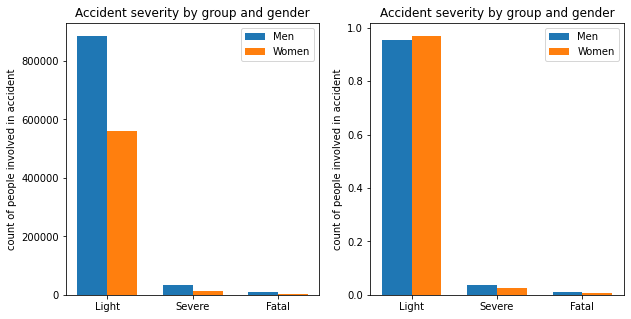

In [457]:
ind = np.arange(len(full_involved['accident_severity_hebrew'].unique()))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(1,2,figsize=(10,5))
rects1 = ax[0].bar(ind - width/2, full_involved[full_involved['sex_hebrew']=='זכר'].groupby('accident_severity_hebrew').size().sort_values(ascending=False), width, label='Men')
rects2 = ax[0].bar(ind + width/2, full_involved[full_involved['sex_hebrew']=='נקבה'].groupby('accident_severity_hebrew').size().sort_values(ascending=False), width, label='Women')
ax[0].set_ylabel('count of people involved in accident')
ax[0].set_title('Accident severity by group and gender')
ax[0].set_xticks(ind)
ax[0].set_xticklabels(('Light', 'Severe', 'Fatal'))
ax[0].legend()

sum_men,sum_women = full_involved[full_involved['sex_hebrew']=='זכר'].groupby('accident_severity_hebrew').size().sum(),full_involved[full_involved['sex_hebrew']=='נקבה'].groupby('accident_severity_hebrew').size().sum()
rects1 = ax[1].bar(ind - width/2, full_involved[full_involved['sex_hebrew']=='זכר'].groupby('accident_severity_hebrew').size().sort_values(ascending=False)/sum_men, width, label='Men')
rects2 = ax[1].bar(ind + width/2, full_involved[full_involved['sex_hebrew']=='נקבה'].groupby('accident_severity_hebrew').size().sort_values(ascending=False)/sum_women, width, label='Women')
ax[1].set_ylabel('count of people involved in accident')
ax[1].set_title('Accident severity by group and gender')
ax[1].set_xticks(ind)
ax[1].set_xticklabels(('Light', 'Severe', 'Fatal'))
ax[1].legend()



In [426]:
full_involved[full_involved['sex_hebrew']=='נקבה'].groupby('accident_severity_hebrew').size().sum()

577360

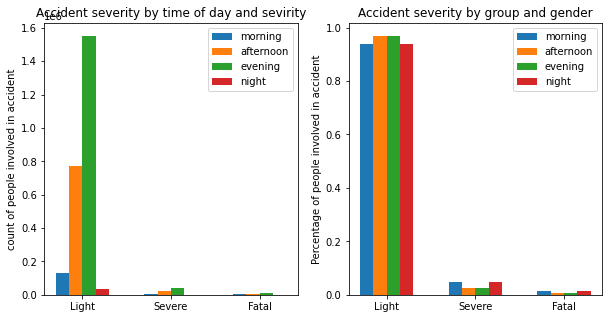

In [467]:
ind = np.arange(len(full_involved['accident_severity_hebrew'].unique()))  # the x locations for the groups
width = .15  # the width of the bars

fig, ax = plt.subplots(1,2,figsize=(10,5))
rects1 = ax[0].bar(ind - 3/2*width, full_involved[(full_involved.accident_hour<=6) & ((full_involved.accident_hour<12))].groupby('accident_severity_hebrew').size().sort_values(ascending=False), width, label='morning')
rects2 = ax[0].bar(ind - .5*width, full_involved[(full_involved.accident_hour<=12) & ((full_involved.accident_hour<18))].groupby('accident_severity_hebrew').size().sort_values(ascending=False), width, label='afternoon')
rects3 = ax[0].bar(ind + .5*width, full_involved[(full_involved.accident_hour<=18) & ((full_involved.accident_hour<=23))].groupby('accident_severity_hebrew').size().sort_values(ascending=False), width, label='evening')
rects4 = ax[0].bar(ind + 3/2*width, full_involved[(full_involved.accident_hour<=0) & ((full_involved.accident_hour<6))].groupby('accident_severity_hebrew').size().sort_values(ascending=False), width, label='night')
ax[0].set_ylabel('count of people involved in accident')
ax[0].set_title('Accident severity by time of day and sevirity')
ax[0].set_xticks(ind)
ax[0].set_xticklabels(('Light', 'Severe', 'Fatal'))
ax[0].legend()



sum_mor,sum_noon,sum_eve,sum_night = full_involved[(full_involved.accident_hour<=6) & ((full_involved.accident_hour<12))].groupby('accident_severity_hebrew').size().sort_values(ascending=False).sum(),full_involved[(full_involved.accident_hour<=12) & ((full_involved.accident_hour<18))].groupby('accident_severity_hebrew').size().sort_values(ascending=False).sum(),full_involved[(full_involved.accident_hour<=18) & ((full_involved.accident_hour<=23))].groupby('accident_severity_hebrew').size().sort_values(ascending=False).sum(),full_involved[(full_involved.accident_hour<=0) & ((full_involved.accident_hour<6))].groupby('accident_severity_hebrew').size().sort_values(ascending=False).sum()
rects1 = ax[1].bar(ind - 3/2*width, full_involved[(full_involved.accident_hour<=6) & ((full_involved.accident_hour<12))].groupby('accident_severity_hebrew').size().sort_values(ascending=False)/sum_mor, width, label='morning')
rects2 = ax[1].bar(ind - .5*width, full_involved[(full_involved.accident_hour<=12) & ((full_involved.accident_hour<18))].groupby('accident_severity_hebrew').size().sort_values(ascending=False)/sum_noon, width, label='afternoon')
rects3 = ax[1].bar(ind + .5*width, full_involved[(full_involved.accident_hour<=18) & ((full_involved.accident_hour<=23))].groupby('accident_severity_hebrew').size().sort_values(ascending=False)/sum_eve, width, label='evening')
rects4 = ax[1].bar(ind + 3/2*width, full_involved[(full_involved.accident_hour<=0) & ((full_involved.accident_hour<6))].groupby('accident_severity_hebrew').size().sort_values(ascending=False)/sum_night, width, label='night')
ax[1].set_ylabel('Percentage of people involved in accident')
ax[1].set_title('Accident severity by group and gender')
ax[1].set_xticks(ind)
ax[1].set_xticklabels(('Light', 'Severe', 'Fatal'))
ax[1].legend()